#  DSP LAB Experiment 1
Author: P. Ramyashri <br>
Email: pramyshri.191ee138@gmail.com <br>
Roll: 191EE138 <br>
Date: 31/08/2021<br>

GITHUB LINK: 

## Problem 1. (Generating signals)

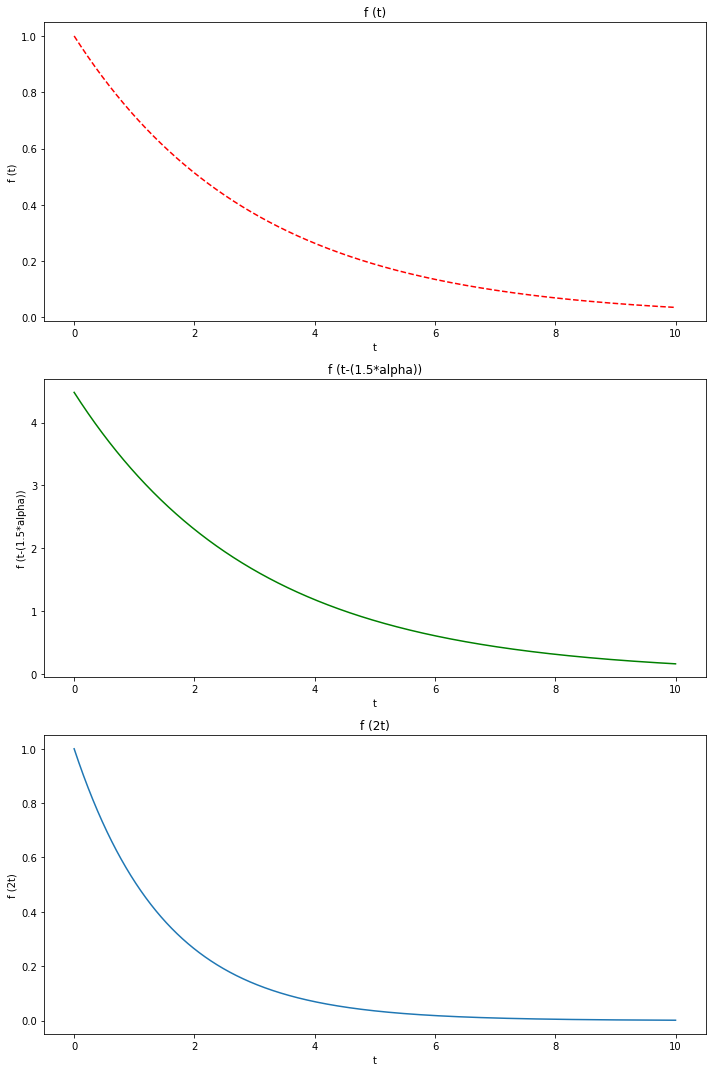

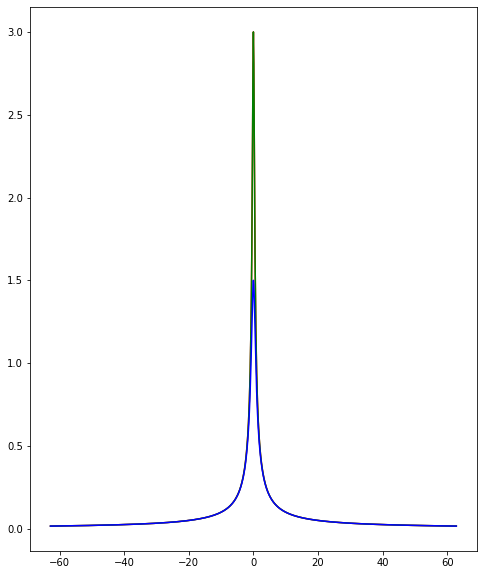

In [131]:
#Problem 1. (Generating signals)

import matplotlib.pyplot as plt

import numpy as np

alpha = 1+ 138%4 #Roll number 191EE138

#sin function definition 
def f(t):
    return np.exp(-(t/alpha))

#time axis discretisation 
t=np.arange(0,10, 0.001)

#functions 
a=f(t)
b=f(t-(1.5*alpha))
c=f(2*t)

#plots
fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=[10,15])
ax1.plot(t,a,'r--')
ax1.set(title='f (t)', ylabel='f (t)',xlabel='t')
ax2.plot(t,b,'g')
ax2.set(title='f (t-(1.5*alpha))', ylabel='f (t-(1.5*alpha))',xlabel="t")
ax3.plot(t,c)
ax3.set(title='f (2t)', ylabel='f (2t)',xlabel="t")
plt.tight_layout()
plt.show()


#Fourier Transforms
w = 2*np.pi*np.linspace(-10,10,num = 1001)
fa = 1/(1j*w + (1/alpha)) #Fourier transform of an exponential function 
fb = (np.exp(-1j*w*(1.5*alpha)))/(1j*w+(1/alpha)) #Y2 = Y1(w)* exp(-jwt0) (Time shofting operation )
fc = 0.5 * 1/((1j*w*0.5)+(1/alpha))               # Y3 = 1/2 * Y1(w/2) (Time scaling )
 
plt.figure()
plt.plot(w,np.abs(Y1),'r')
plt.plot(w,np.abs(Y2),'g')
plt.plot(w,np.abs(Y3),'b')


#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
#Libraries and methods used  
# 1) Numpy : np.exp to create a exponential function , np.arange to create a series of numbers
# 2) Matplotlib : plt.subplots to plot the graphs
#commands leanrt on latex: \verb|insert another latex comnmand here|

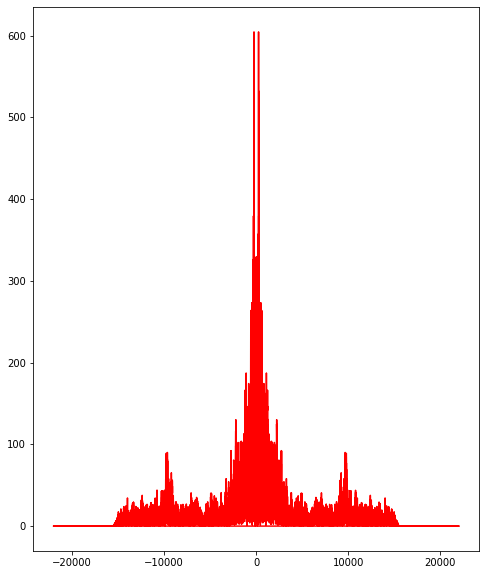

In [116]:
#fourier transforms analytically, hardcoding 
w = 2*np.pi*np.linspace(-10,10,num = 1001)
Y1 = 1/(1j*w + (1/alpha))
Y2 = (np.exp(-1j*w*(1.5*alpha)))/(1j*w+(1/alpha)) #Y2 = Y1(w)* exp(-jwt0)
Y3 = 0.5 * 1/((1j*w*0.5)+(1/alpha))               # Y3 = 1/2 * Y1(w/2)

plt.figure()
plt.rcParams["figure.figsize"] = (8,10)
plt.plot(w,np.abs(Y1),'r')
plt.plot(w,np.abs(Y2),'r')
plt.plot(w,np.abs(Y3),'g')


## Problem 2. (Generating tones) 

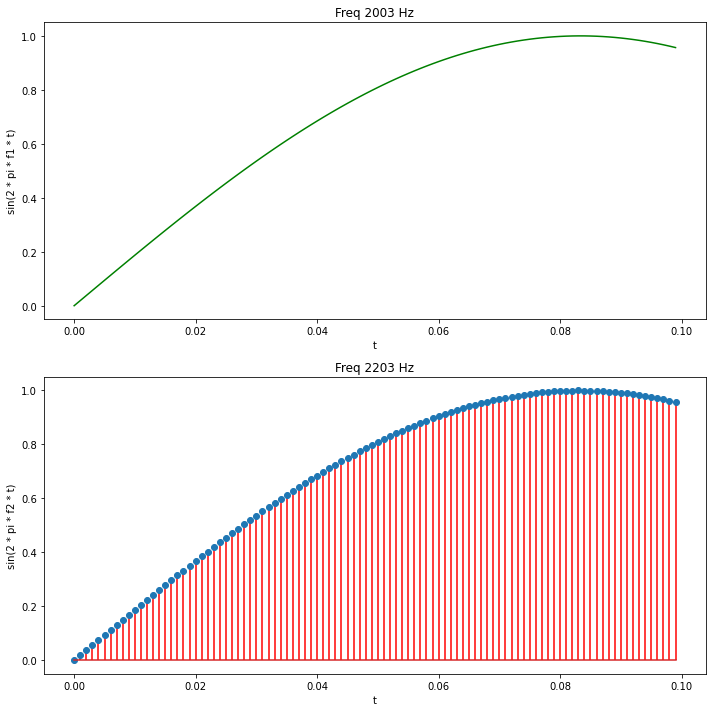

In [100]:

#Problem 2. (Generating tones)

#importing relevent libraries 

import IPython.display as ipd
from scipy.io.wavfile import write

#sin function definition 
def f(t,f):
    return np.sin(2*np.pi*f*t)

t1 = np.arange(0.0, 5.0, 0.001) #resolution =0.001, samples 5000

f1=2003 #alpha= 3 , frequency 200alpha 
f2=2203

#appending two functions of different frequencies to genrate a 2X5000 matrix
h=f(t1,f1).reshape(1,5000)
g=f(t1,f2).reshape(1,5000)
final=np.append(h,g, axis=0)
np.shape(final)#2 X 5000 shaped matrix created, i don't seem ti understand the reason for this tho 

#can't plot a 2*5000 matrix , so flattened the matrix using append fucntion  
flatten_merge=np.append(h,g)

#writing the appended function to a wav file , both flattened version and 2 rows version 
data=final
write("Problem2rows.wav", 5000, data.astype(np.float32))
ipd.Audio(final, rate=3000)

write("Problem2Flatten.wav", 5000, flatten_merge.astype(np.float32))

#observations: Audio is heard only for sample rates above 3000 

#can't plot a 2*5000 matrix , so flattened the matrix using append fucntion  
flatten_merge=np.append(h,g)

#plotting the first 100 samples
fig, (ax1,ax2)=plt.subplots(2,figsize=[10,10])
ax1.plot(t1[0:100], flatten_merge[0:100], 'g')
ax1.set(title='Freq 2003 Hz', ylabel='sin(2 * pi * f1 * t)',xlabel='t')

#stem plot 
ax2.stem(t1[0:100], flatten_merge[0:100], 'r')
ax2.set(title='Freq 2203 Hz', ylabel='sin(2 * pi * f2 * t)',xlabel='t')

plt.tight_layout()
plt.show()

#normal plot vs stem plot? stem plot has vertical lines from the data point to the x axis at discrete intervals of time

#references: https://musicinformationretrieval.com/ipython_audio.html

## Problem 3. (Convolution)

In [101]:

#Problem 3. (Convolution)

import librosa, scipy
x, sr = librosa.load('Track003.wav')
ipd.Audio(x, rate=sr)

y=np.loadtxt('ConvFile3.txt')

#experinmenting with different modes of convolve function 
# mode 1: FULL , The output is the full discrete linear convolution of the inputs. (Default)
# mode 2: Valid , The output consists only of those elements that do not rely on the zero-padding. In ‘valid’ mode, either in1 or in2 must be at least as large as the other in every dimension.
# mode 3: Same ,The output is the same size as in1, centered with respect to the ‘full’ output.


#mode "FULL"
conv_xyFULL = scipy.signal.convolve(x, y, mode='full', method='auto')
write("conv_xyFULL.wav", 5000, data.astype(np.float32))

conv_xyVALID = scipy.signal.convolve(x, y, mode='valid', method='auto')
write("conv_xyVALID.wav", 5000, data.astype(np.float32))

conv_xySAME = scipy.signal.convolve(x, y, mode='same', method='auto')
write("conv_xySAME.wav", 5000, data.astype(np.float32))

#references https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html


In [102]:
ipd.Audio(conv_xyFULL, rate=sr)


In [103]:
ipd.Audio(conv_xyVALID, rate=sr)

In [104]:
ipd.Audio(conv_xySAME, rate=sr)


In [105]:
#inferences: Convolution acts as a high pass filter , conv with Valid mode has a audio time of only 14seconds 

## Problem 4. (Amplitude Modulation)

In [106]:
#Problem 4. (Amplitude Modulation)

x, Fs = librosa.load('speech.wav')
np.min(x)

-0.9928759

In [107]:
n=np.arange(0,52543,1)
cos=np.cos(2*np.pi*(500/Fs)*n)
def y(n):
    return np.multiply(x,cos)


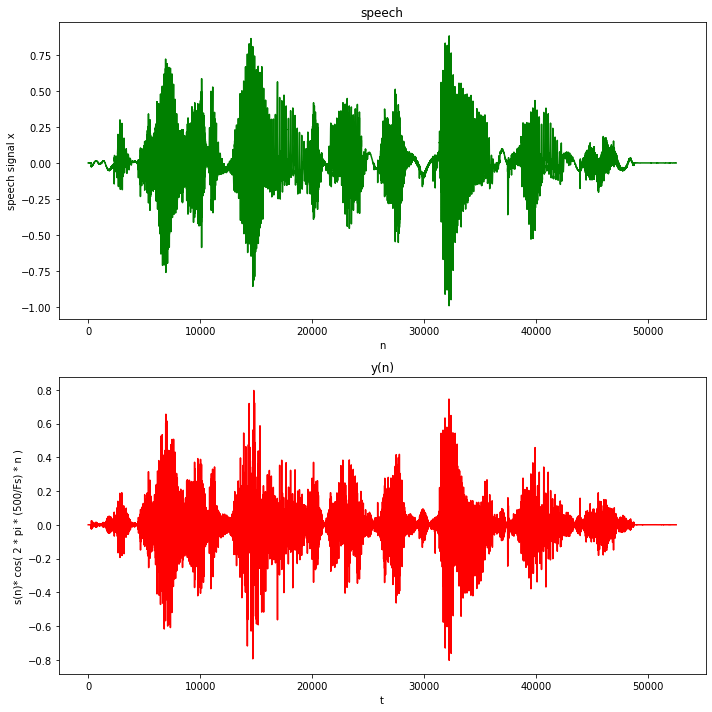

In [108]:
#plotting 

fig, (ax1,ax2)=plt.subplots(2,figsize=[10,10])
ax1.plot(n,x, 'g')
ax1.set(title='speech', ylabel='speech signal x',xlabel='n')

ax2.plot(n,y(n), 'r')
ax2.set(title='y(n)', ylabel='s(n)* cos( 2 * pi * (500/Fs) * n )',xlabel='t')

plt.tight_layout()
plt.show()

#don't seem to notice any major difference in the time plots 


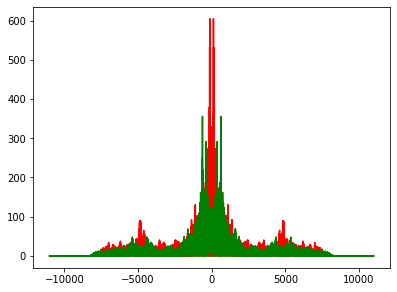

In [143]:
#fft : reference code https://realpython.com/python-scipy-fft/ 


#plotting amplitude spectrum using fft()
from scipy.fft import fft, fftfreq
from matplotlib.pyplot import figure

yf = fft(x)
N=len(x)
xf = fftfreq(N, 1 / Fs)

plt.plot(xf, np.abs(yf),'r')
yf2 = fft(y(n))
N=len(x)
xf2 = fftfreq(N, 1 / Fs)

plt.plot(xf2, np.abs(yf2),'g')

# setting figsize : plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
#plt.rcParams["figure.figsize"] = (20,20)
plt.show()
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
# setting figsize : plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


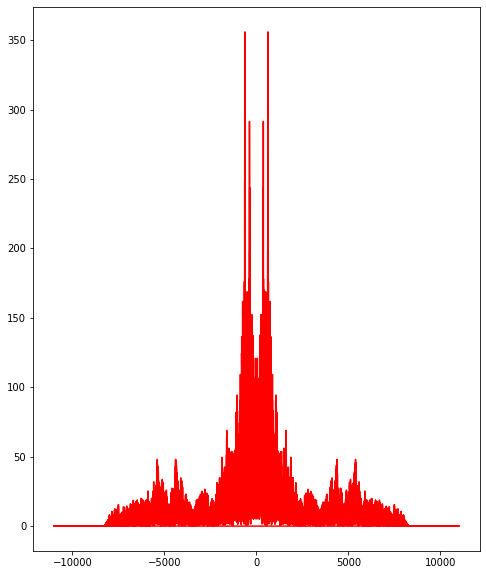

In [132]:
yf2 = fft(y(n))
N=len(x)
xf2 = fftfreq(N, 1 / Fs)

plt.plot(xf2, np.abs(yf2),'r')
# default figsize : plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
# setting figsize : plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plt.show()